In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
covid_df=pd.read_csv('E:/Data Analysis/Eda with python/covid-19/Latest Covid-19 India Status.csv')

In [9]:
covid_df.head()


,State/UTs,Total Cases,Active,Discharged,Deaths,Active Ratio,Discharge Ratio,Death Ratio,Population
0,Andaman and Nicobar,10747,0,10618,129,0.0,98.80,1.20,100896618
1,Andhra Pradesh,2339078,7,2324338,14733,0.0,99.37,0.63,128500364
2,Arunachal Pradesh,66891,0,66595,296,0.0,99.56,0.44,658019
3,Assam,746100,0,738065,8035,0.0,98.92,1.08,290492
4,Bihar,851404,1,839100,12303,0.0,98.55,1.45,40100376


In [4]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   State/UTs        36 non-null     object 
 1   Total Cases      36 non-null     int64  
 2   Active           36 non-null     int64  
 3   Discharged       36 non-null     int64  
 4   Deaths           36 non-null     int64  
 5   Active Ratio     36 non-null     float64
 6   Discharge Ratio  36 non-null     float64
 7   Death Ratio      36 non-null     float64
 8   Population       36 non-null     int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 2.7+ KB


In [6]:
covid_df.describe()

,Total Cases,Active,Discharged,Deaths,Active Ratio,Discharge Ratio,Death Ratio,Population
count,3.600000e+01,36.000000,3.600000e+01,36.000000,36.000000,36.000000,36.000000,3.600000e+01
mean,1.241145e+06,56.527778,1.226346e+06,14742.388889,0.002222,98.893333,1.103889,3.971861e+07
std,1.834031e+06,215.847762,1.808252e+06,27170.089767,0.007601,0.498764,0.498479,5.050913e+07
min,1.074700e+04,0.000000,1.061800e+04,4.000000,0.000000,97.540000,0.030000,6.600100e+04
25%,1.058650e+05,0.000000,1.048640e+05,1120.750000,0.000000,98.672500,0.842500,1.695473e+06
50%,6.127720e+05,7.500000,6.063570e+05,6542.000000,0.000000,98.925000,1.070000,2.410088e+07
75%,1.320822e+06,27.500000,1.311256e+06,14292.750000,0.000000,99.150000,1.327500,6.979986e+07
max,8.136945e+06,1300.000000,7.988392e+06,148419.000000,0.040000,99.970000,2.460000,2.315026e+08


In [16]:
covid_df.drop(['Active Ratio','Discharge Ratio','Death Ratio'],inplace=True,axis=1)

In [17]:
covid_df.head()

,State/UTs,Total Cases,Active,Discharged,Deaths
0,Andaman and Nicobar,10747,0,10618,129
1,Andhra Pradesh,2339078,7,2324338,14733
2,Arunachal Pradesh,66891,0,66595,296
3,Assam,746100,0,738065,8035
4,Bihar,851404,1,839100,12303


In [19]:
statewise=pd.pivot_table(covid_df,values=['Total Cases','Discharged','Deaths'],index='State/UTs',aggfunc=max)

In [20]:
statewise['Recovery Rate']=statewise['Discharged']*100/statewise['Total Cases']

In [21]:
statewise['Mortality Rate']=statewise['Deaths']*100/statewise['Total Cases']

In [22]:
statewise=statewise.sort_values(by='Total Cases',ascending=False)

In [25]:
statewise.style.background_gradient(cmap='cubehelix')

,Deaths,Discharged,Total Cases,Recovery Rate,Mortality Rate
State/UTs,,,,,
Maharashtra,148419,7988392,8136945,98.174339,1.824014
Kerala,71570,6756379,6829249,98.932972,1.047992
Karnataka,40308,4032105,4072536,99.007228,0.989752
Tamil Nadu,38049,3556466,3594573,98.939874,1.058512
Andhra Pradesh,14733,2324338,2339078,99.369837,0.629864
Uttar Pradesh,23634,2104502,2128154,98.888614,1.110540
West Bengal,21532,2097114,2118696,98.981355,1.016285
Delhi,26522,1980781,2007313,98.678233,1.321269
Odisha,9205,1327306,1336595,99.305025,0.688690


In [26]:
#top 10 active cases 
top_active_cases=covid_df.groupby(by='State/UTs').max()[['Active']].sort_values(by=['Active'],ascending=False).reset_index()

In [38]:
fig=plt.figure(figsize=(16,9))

<Figure size 1600x900 with 0 Axes>

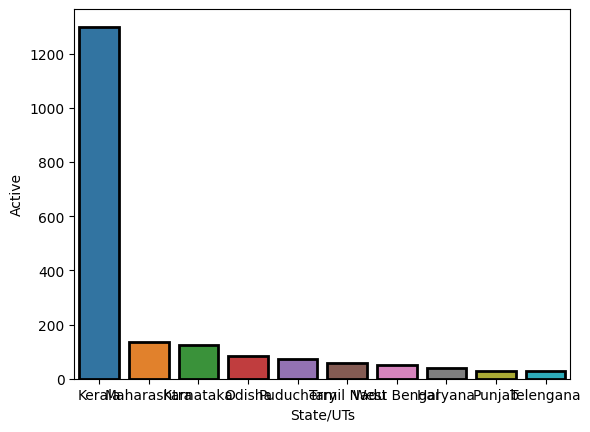

In [43]:
ax=sns.barplot(data=top_active_cases.iloc[:10],y='Active',x='State/UTs',linewidth=2,edgecolor='black')

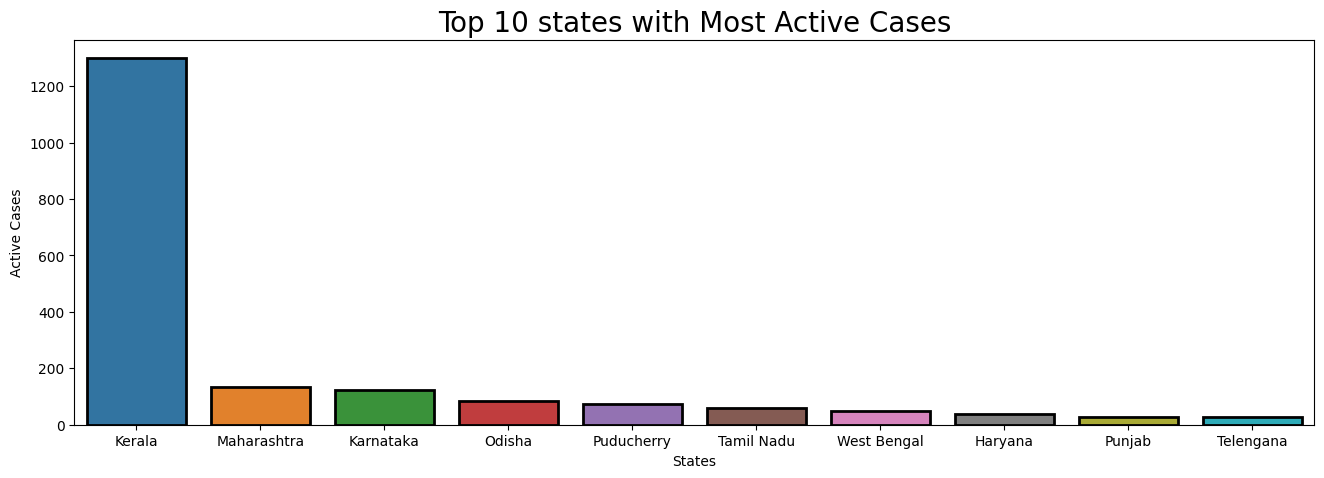

In [55]:
#top 10 active cases 
top_active_cases=covid_df.groupby(by='State/UTs').max()[['Active']].sort_values(by=['Active'],ascending=False).reset_index()
fig=plt.figure(figsize=(16,5))
plt.title('Top 10 states with Most Active Cases',size=20)
ax=sns.barplot(data=top_active_cases.iloc[:10],y='Active',x='State/UTs',linewidth=2,edgecolor='black')
plt.xlabel('States')
plt.ylabel('Active Cases')

plt.show()

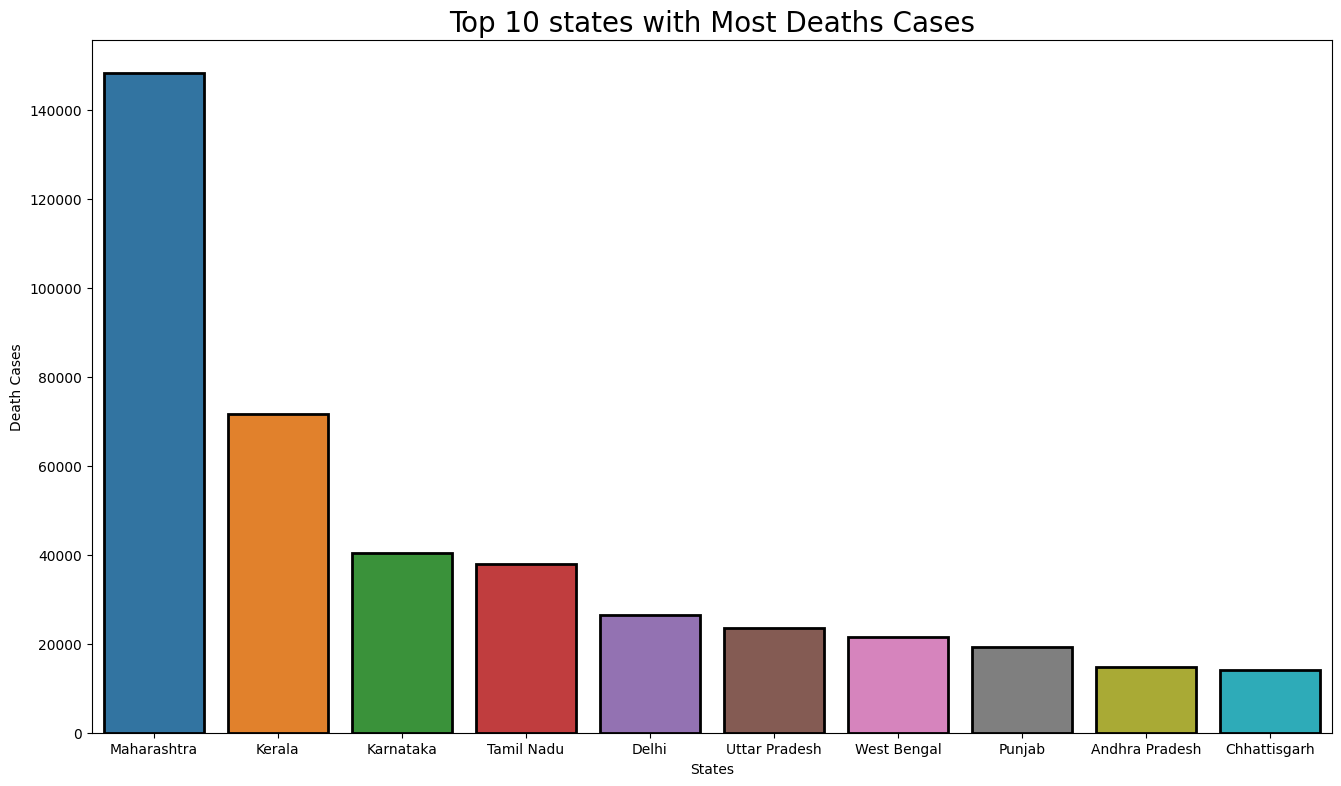

In [49]:
#top 10 states with highest Death cases 
top_active_cases=covid_df.groupby(by='State/UTs').max()[['Deaths']].sort_values(by=['Deaths'],ascending=False).reset_index()
fig=plt.figure(figsize=(16,9))
plt.title('Top 10 states with Most Deaths Cases',size=20)
ax=sns.barplot(data=top_active_cases.iloc[:10],y='Deaths',x='State/UTs',linewidth=2,edgecolor='black')
plt.xlabel('States')
plt.ylabel('Death Cases')

plt.show()